# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE#
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # YOUR CODE HERE#
    city_url = f"{url}appid={weather_api_key}&units={temp_units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # YOUR CODE HERE#
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # YOUR CODE HERE#
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | mana
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | labytnangi
Processing Record 10 of Set 1 | okhotsk
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | gazojak
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | kununurra
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# YOUR CODE HERE#
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.52,88,100,2.79,TF,1698268459
1,blackmans bay,-43.0167,147.3167,7.07,74,98,1.34,AU,1698268459
2,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1698268459
3,mana,5.6592,-53.7767,28.04,76,98,5.83,GF,1698268460
4,edinburgh of the seven seas,-37.0676,-12.3116,10.43,56,16,6.17,SH,1698268460


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.52,88,100,2.79,TF,1698268459
1,blackmans bay,-43.0167,147.3167,7.07,74,98,1.34,AU,1698268459
2,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1698268459
3,mana,5.6592,-53.7767,28.04,76,98,5.83,GF,1698268460
4,edinburgh of the seven seas,-37.0676,-12.3116,10.43,56,16,6.17,SH,1698268460


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

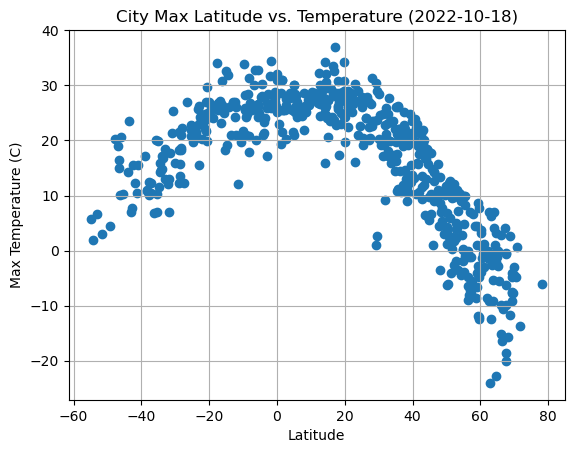

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE#
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE#
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

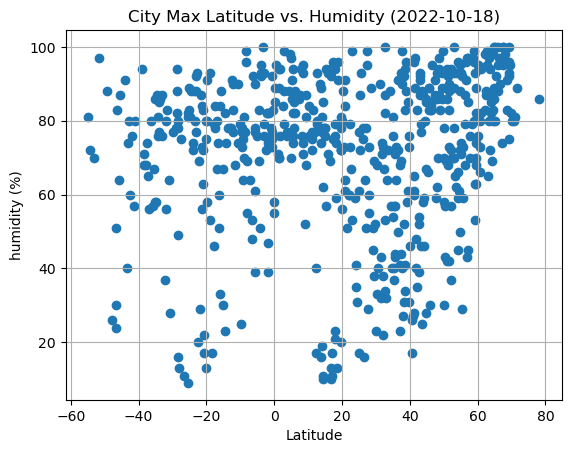

In [9]:
# Build scatter plot for latitude vs. humidity
# YOUR CODE HERE#
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE#
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.ylabel("humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

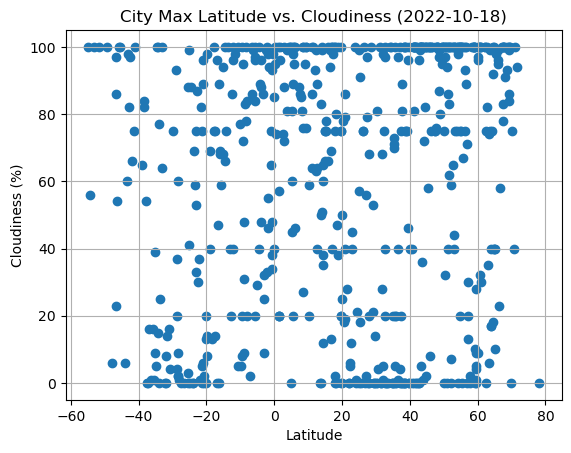

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

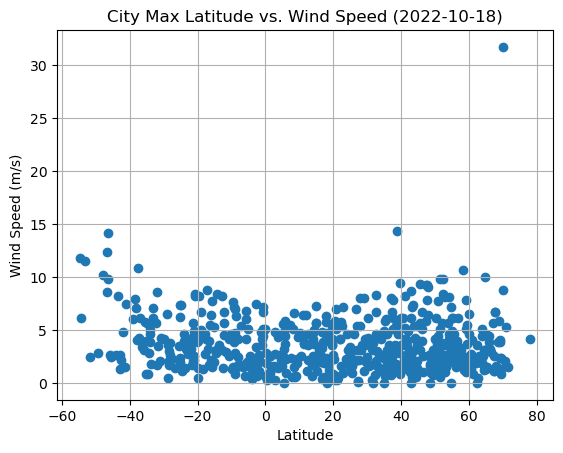

In [92]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [29]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy import stats

In [13]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date']]


# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,mana,5.6592,-53.7767,28.04,76,98,5.83,GF,1698268460
6,udachny,66.4167,112.4000,-16.36,97,23,3.21,RU,1698268461
7,labytnangi,66.6572,66.4183,-10.68,90,58,2.88,RU,1698268461
8,okhotsk,59.3833,143.3000,-11.83,82,28,5.48,RU,1698268461
9,albany,42.6001,-73.9662,21.23,54,96,1.77,US,1698268403
...,...,...,...,...,...,...,...,...,...
571,marabba,12.3500,32.1833,32.27,40,63,3.64,SD,1698268625
574,neryungri,56.6709,124.6491,-8.13,91,100,4.00,RU,1698268626
575,colares,38.7992,-9.4469,21.29,96,100,14.31,PT,1698268626


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = northern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date']]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.52,88,100,2.79,TF,1698268459
1,blackmans bay,-43.0167,147.3167,7.07,74,98,1.34,AU,1698268459
2,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1698268459
4,edinburgh of the seven seas,-37.0676,-12.3116,10.43,56,16,6.17,SH,1698268460
5,grytviken,-54.2811,-36.5092,1.86,72,56,6.17,GS,1698268460


###  Temperature vs. Latitude Linear Regression Plot

In [39]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']


In [43]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
3      32.248851
6      -2.388302
7      -2.525409
8       1.621358
9      11.189268
         ...    
571    28.434503
574     3.167666
575    13.356117
576     0.634364
577     9.640565
Name: Lat, Length: 406, dtype: float64


In [91]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.06x +2.88


The r-value is: 0.7564233270282223


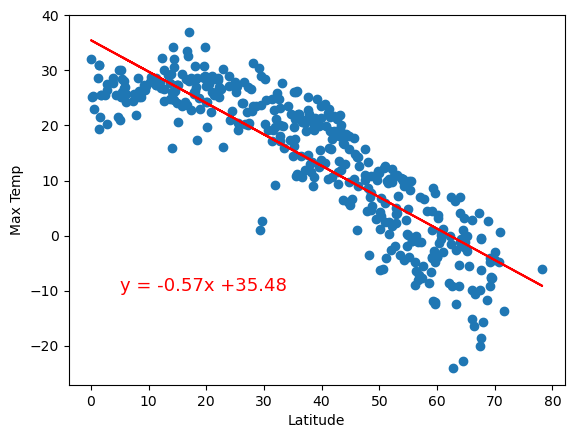

In [46]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,-10),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [47]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      10.772110
1      13.156954
2      24.777441
4      15.397124
5       8.915273
         ...    
565    16.070520
566    20.724717
567    25.323260
572    18.768658
573    12.259507
Name: Lat, Length: 172, dtype: float64


In [48]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.38x +29.36


The r-value is: 0.5941587916003042


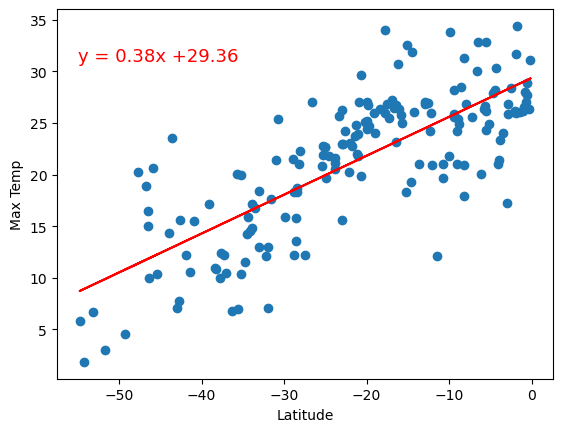

In [51]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55,31),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Discussion about the linear relationship:

- Correlation coefficient Northern Hemisphere: 0.756423327028222
- Correlation coefficient Southern Hemisphere: 0.5941587916003042

- There is a considerable correlation between Latitude and temperature for both northern and southern hemisphere, however this last one has a lower correlation of Lat and Max temperature compared with the northern. 
- So in the way that the latitude increase in + side, then Temperature tends to decrease and the same goes when latitude increase in - side, then Temperature tends to decrease.
- The cities with higher temperatures are located near the Latitude 0
- The cities with lower temperatures are located near the Latitude 80/-80


### Humidity vs. Latitude Linear Regression Plot

In [52]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']


In [53]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
3      65.397200
6      77.953019
7      78.002719
8      76.499534
9      73.031208
         ...    
571    66.779885
574    75.939004
575    72.245735
576    76.857316
577    73.592606
Name: Lat, Length: 406, dtype: float64


In [54]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.21x +64.23


The r-value is: 0.03378559148138304


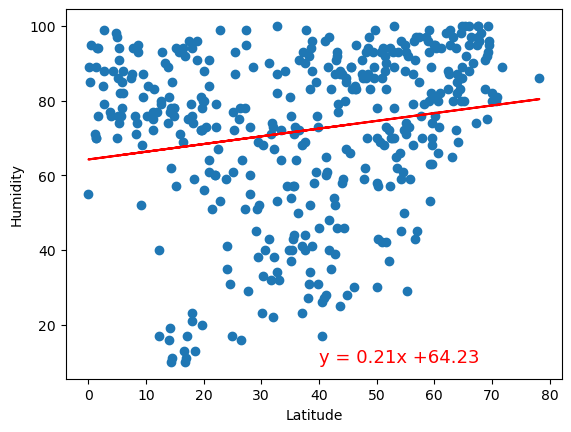

In [55]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,10),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [57]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

In [58]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      65.472501
1      66.422234
2      71.049941
4      67.314352
5      64.733041
         ...    
565    67.582523
566    69.435996
567    71.267306
572    68.657022
573    66.064838
Name: Lat, Length: 172, dtype: float64


In [59]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.15x +72.87


The r-value is: 0.010200746347868698


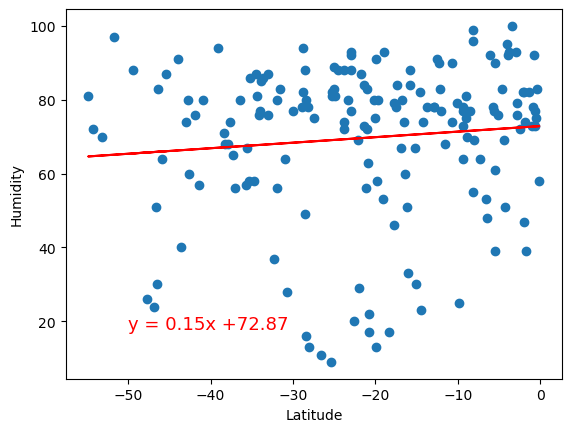

In [61]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,18),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Discussion about the linear relationship:

- Correlation coefficient Northern Hemisphere: 0.03378559148138304
- Correlation coefficient Southern Hemisphere: 0.01020074634786869

- According to the correlation coefficients there is null correlation between Latitude and Humidity for both northern and southern hemisphere.
So in the way that the latitude increase in + side, there are cities with either high and low Humidity, and the same goes when latitude increase in -side.

### Cloudiness vs. Latitude Linear Regression Plot

In [62]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

In [63]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)


City_ID
3      57.738258
6      66.306033
7      66.339947
8      65.314212
9      62.947513
         ...    
571    58.681767
574    64.931720
575    62.411526
576    65.558353
577    63.330597
Name: Lat, Length: 406, dtype: float64


In [64]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.14x +56.94


The r-value is: 0.005006338056669059


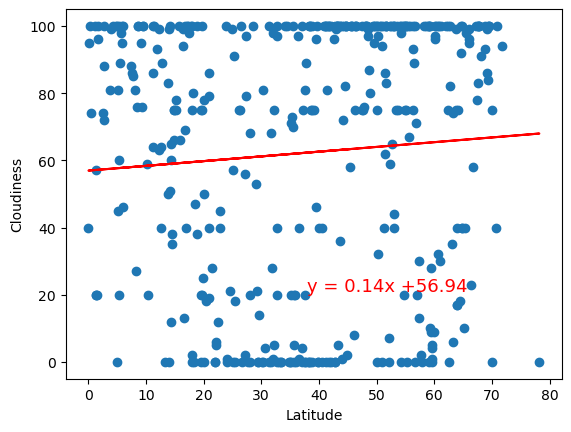

In [67]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(38,21),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [79]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

In [80]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      44.558652
1      46.429919
2      55.547930
4      48.187668
5      43.101686
         ...    
565    48.716048
566    52.367962
567    55.976206
572    50.833141
573    45.725738
Name: Lat, Length: 172, dtype: float64


In [81]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.3x +59.14


The r-value is: 0.012062098915717905


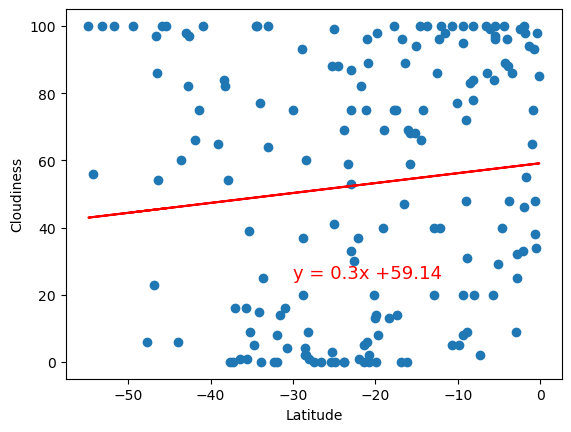

In [82]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,25),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Discussion about the linear relationship:
- Correlation coefficient Northern Hemisphere: 0.005006338056669059
- Correlation coefficient Southern Hemisphere: 0.012062098915717905

- According to the correlation coefficients there is no correlation between Latitude and Cloudiness for both northern and southern hemisphere.
- So in the way that the latitude increase in + side, there are cities with either high and low Cloudiness , and the same goes when latitude increase in - side.

### Wind Speed vs. Latitude Linear Regression Plot

In [83]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

In [84]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
3      2.914863
6      3.862219
7      3.865969
8      3.752551
9      3.490860
         ...   
571    3.019188
574    3.710258
575    3.431595
576    3.779546
577    3.533219
Name: Lat, Length: 406, dtype: float64


In [85]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.02x +2.83


The r-value is: 0.013455324269865192


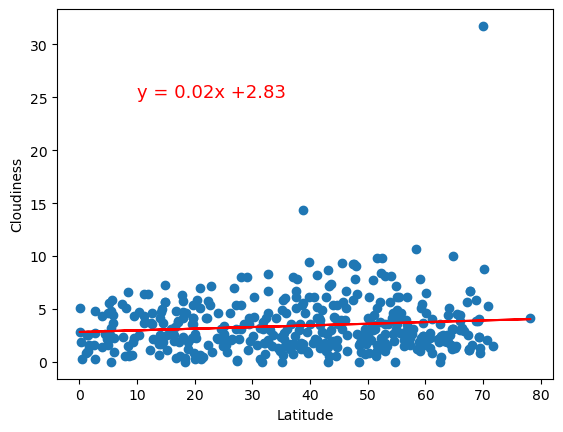

In [76]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(10,25),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [86]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

In [87]:
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      5.801097
1      5.426587
2      3.601733
4      5.074796
5      6.092690
         ...   
565    4.969047
566    4.238163
567    3.516019
572    4.545338
573    5.567520
Name: Lat, Length: 172, dtype: float64


In [88]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.06x +2.88


The r-value is: 0.09855909039134296


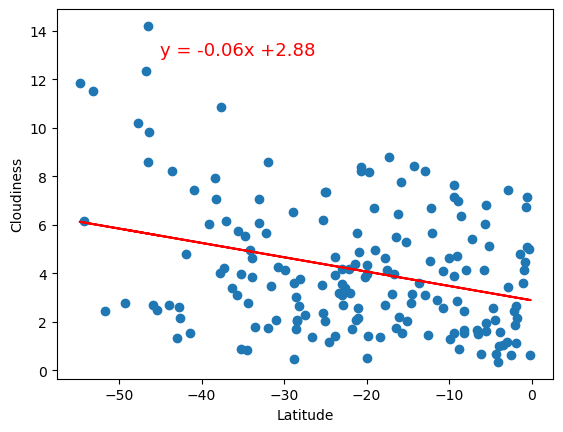

In [90]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-45,13),fontsize=13,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Discussion about the linear relationship:

- Correlation coefficient Northern Hemisphere: 0.013455324269865192
- Correlation coefficient Southern Hemisphere: 0.09855909039134296

- According to the correlation coefficients there is no correlation between Latitude and Wind Speed for both northern and southern hemisphere.
- So in the way that the latitude increase in + side, there are cities with almost the same Wind Speed level, and the same goes when latitude increase in - side.